In [1]:
import os
import importlib  # used to reload modules if necessary
path_to_frontend = '..'
os.chdir(path_to_frontend)
print("current working directory: " + os.getcwd())
import q100viz.session as session
import q100viz.devtools as devtools
import q100viz.graphics.graphs as graphs

current working directory: /home/dunland/github/qScope/qScope_frontend
pygame 2.1.2 (SDL 2.0.16, Python 3.10.6)
Hello from the pygame community. https://www.pygame.org/contribute.html
loading src_points: [[-3.700000000000001, 5.700000000000003], [-2.7000000000000033, 140.60000000000008], [117.69999999999996, 137.8], [117.39999999999998, 1.5000000000000013]]
loading dst_points: [[80, 45], [80, 1035], [1840, 1035], [1840, 45]]


/home/dunland/github/qScope/qScope_frontend/q100viz/buildings.py:37: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  bestand = bestand.drop('Kataster_S', 1)
/home/dunland/github/qScope/qScope_frontend/q100viz/buildings.py:38: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  bestand = bestand.drop('Kataster_H', 1)


## Simulation

In [2]:
# prepare reference data: select buildings without decisions
session.buildings.df['selected'] = True
session.buildings.df['group'] = 1

In [3]:
# simulate until 2045
session.simulation.setup(input_max_year=2045, export_graphs=False)
session.simulation.run()

simulation will run until 2045-12-31 (9496 steps)
******************************************************************
* GAMA version 1.8.2                                             *
* http://gama-platform.org                                       *
* (c) 2007-2022 UMI 209 UMMISCO IRD/SU & Partners                *
******************************************************************
> GAMA: version 1.8.2                         loading on____ linux 5.15.0-52-generic, x86_64, JDK 17.0.3
> JAI : ImageIO extensions                    loaded for____ jpg||tiff|bmp|gif|arx|tf8|TF8|png|ppm|jp2|asc|tif|TIF|TIFF|btf|BTF|pgm|wbmp|jpeg|pbm
> GAMA: msi.gama.core                         loaded in_____ 1326ms
> GAMA: ummisco.gaml.extensions.stats         loaded in_____ 27ms
> GAMA: ummisco.gama.opengl                   loaded in_____ 3ms
> GAMA: ummisco.gama.java2d                   loaded in_____ 1ms
> GAMA: ummisco.gama.network                  loaded in_____ 11ms
> GAMA: msi.gaml.extensions.fipa  

## Export gray individual graphs:

/home/dunland/github/qScope/qScope_frontend/q100viz/graphics/graphs.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=figsize)  # inches


KeyboardInterrupt: 

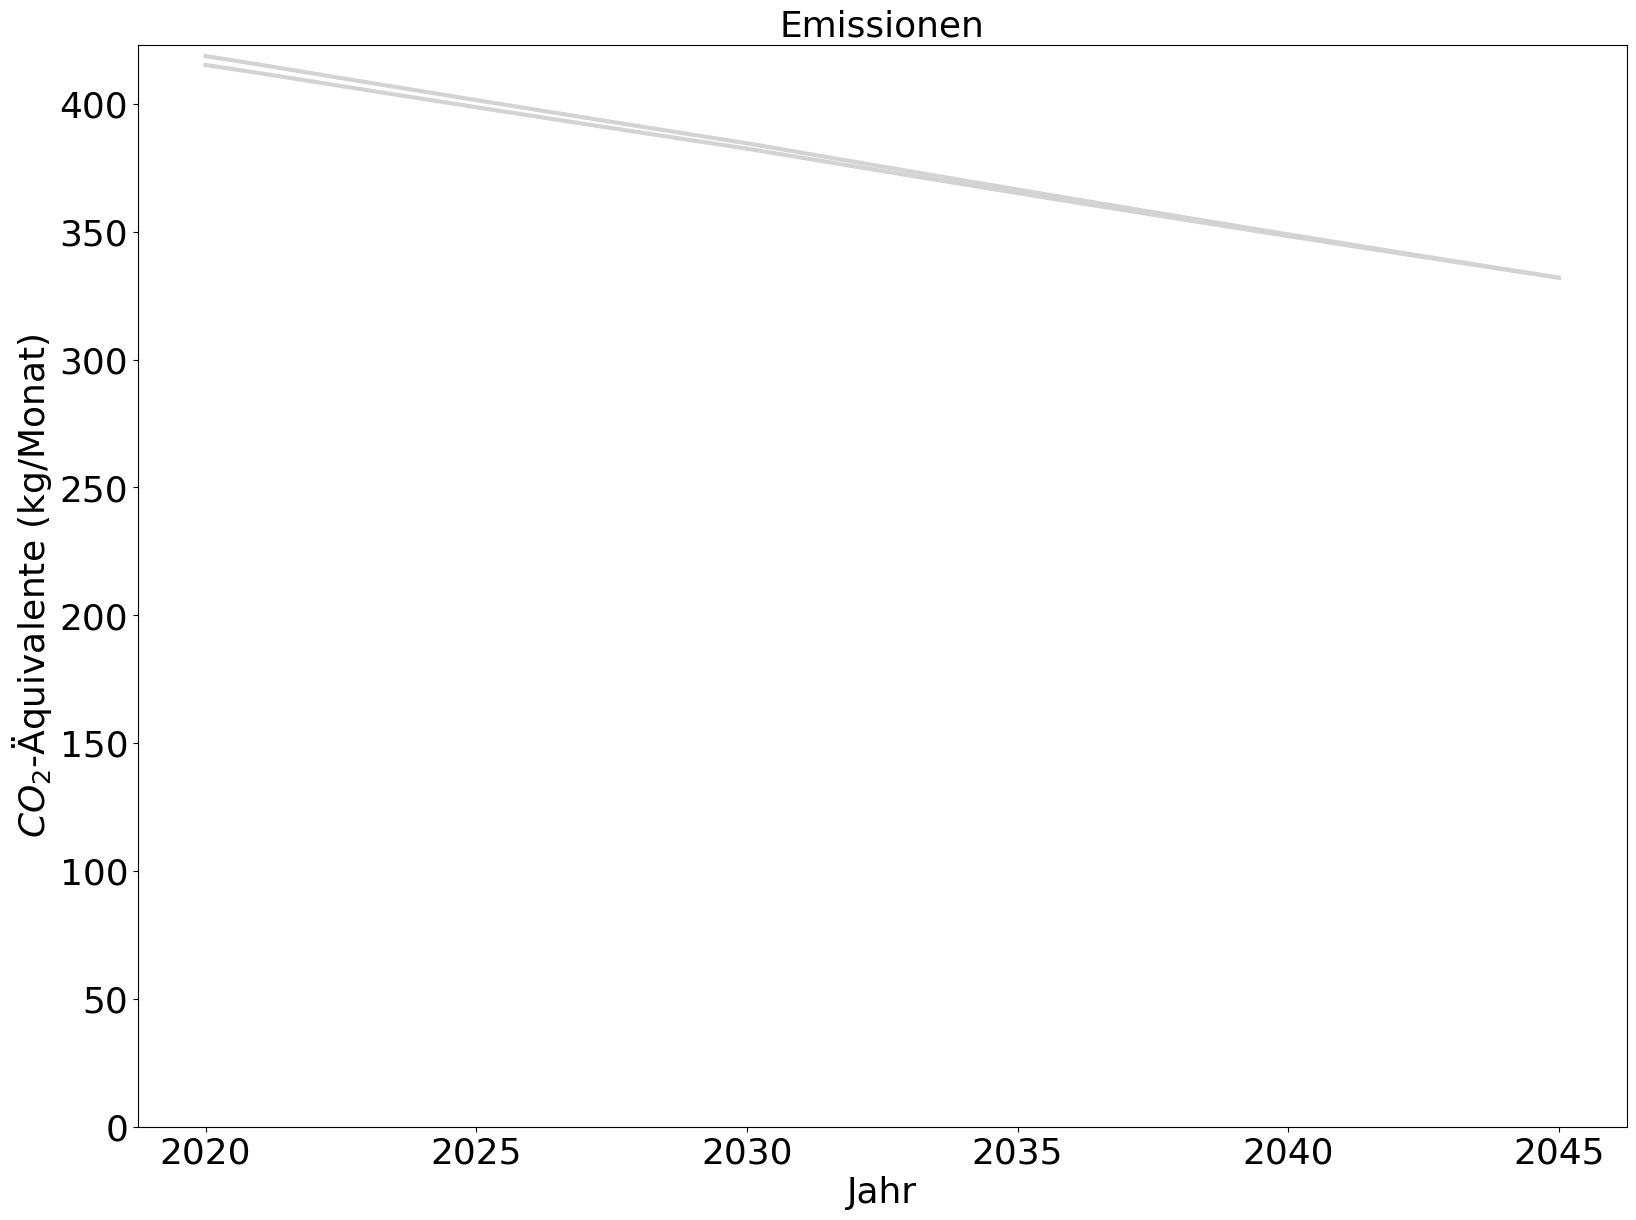

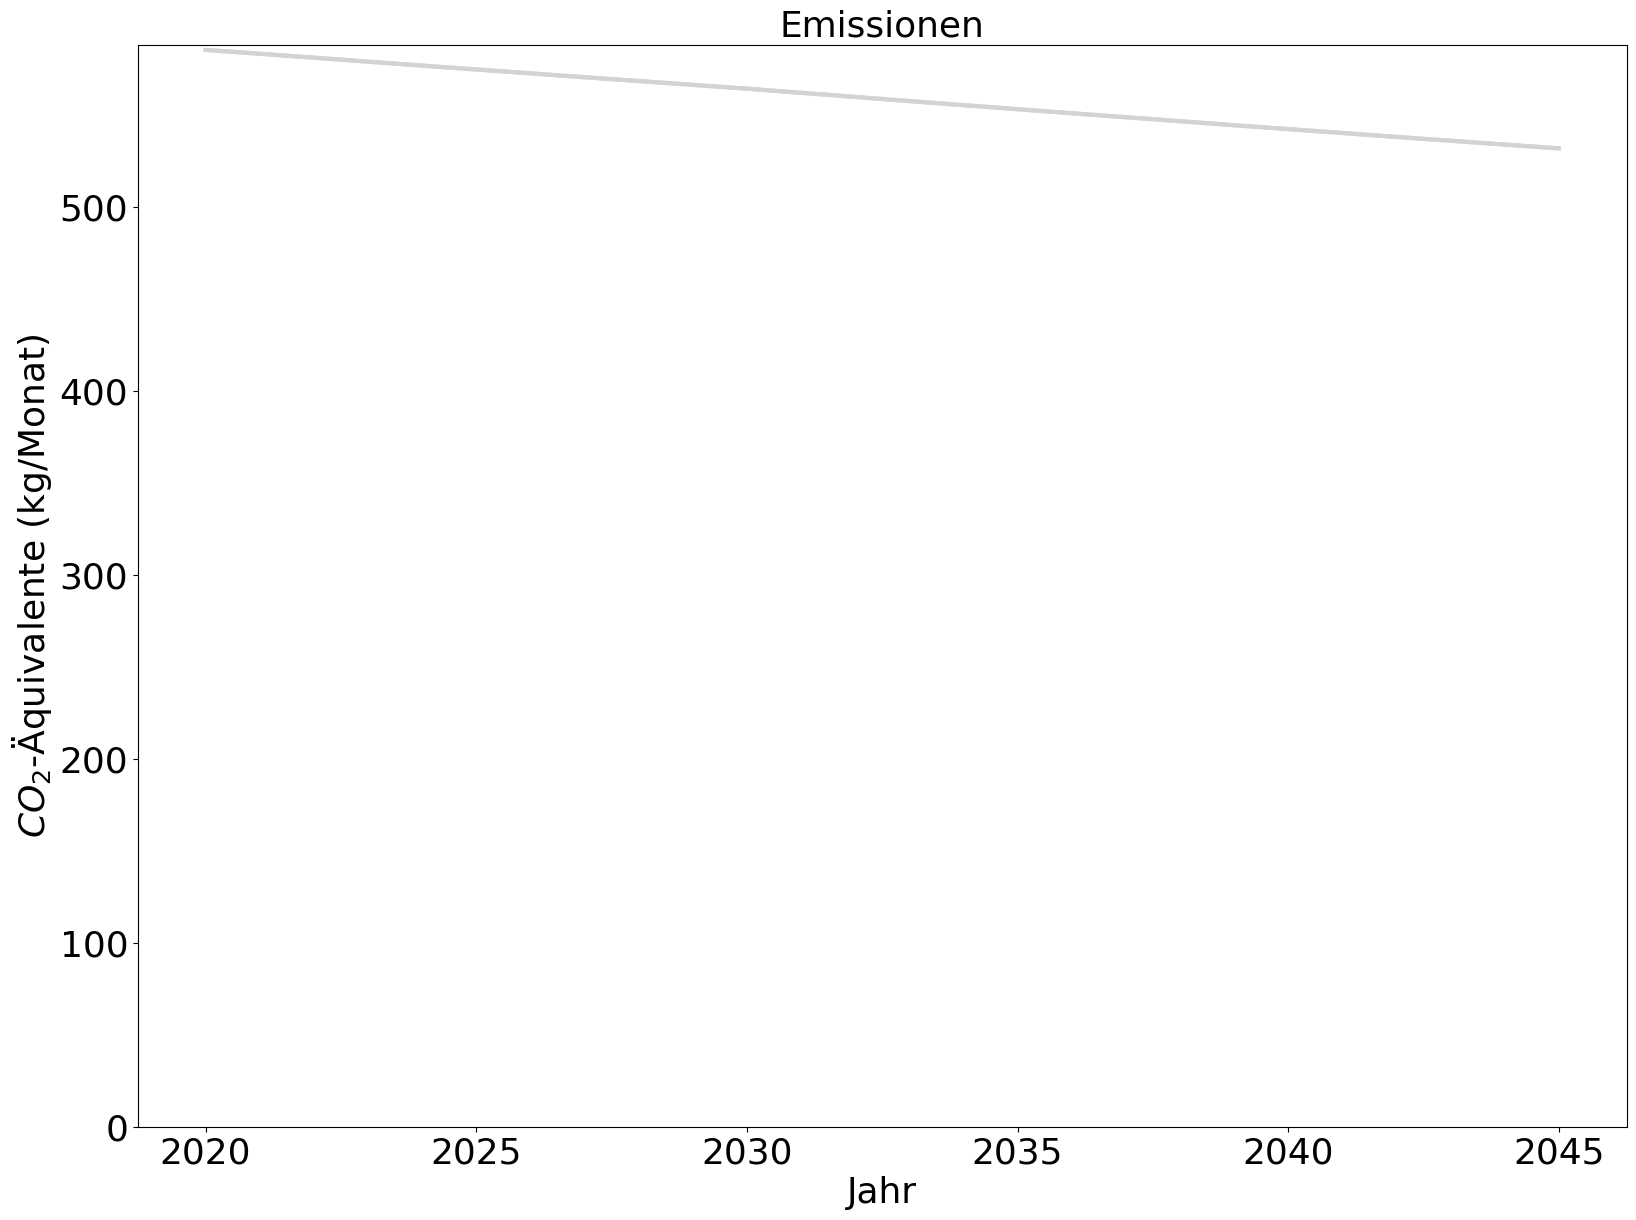

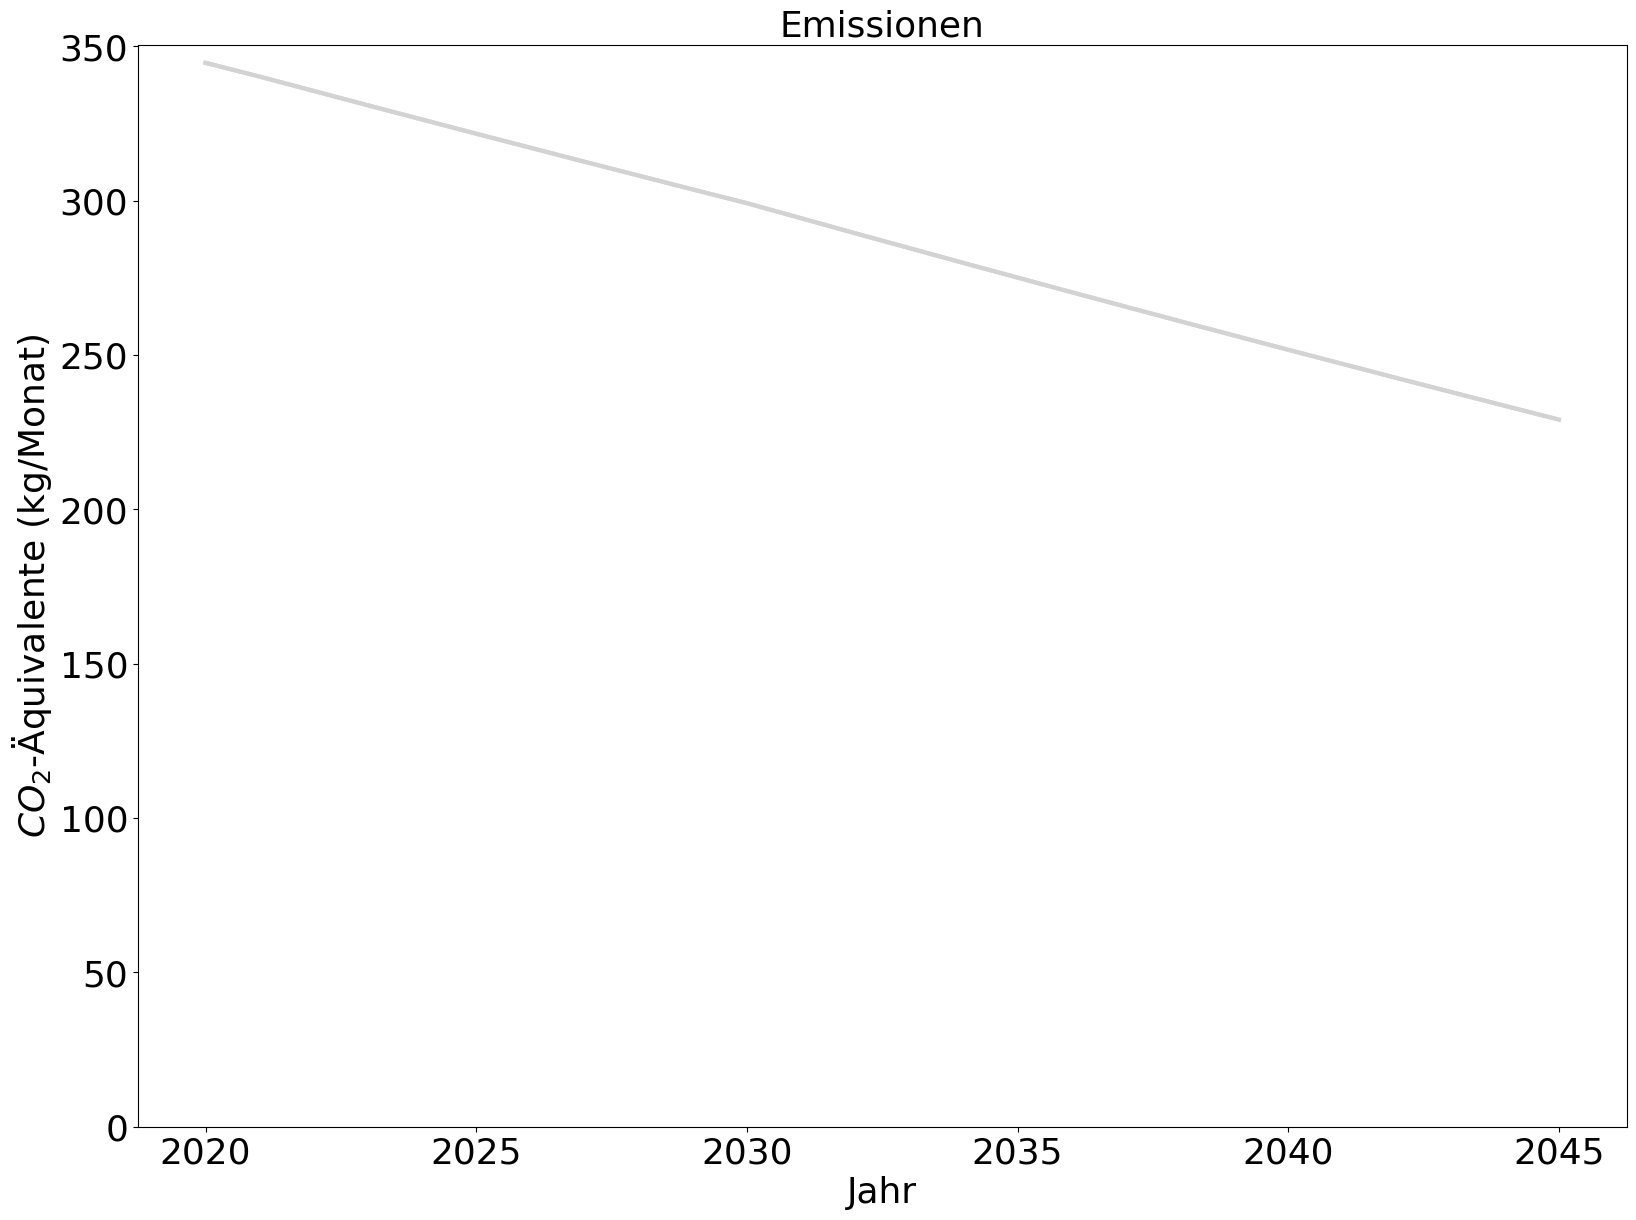

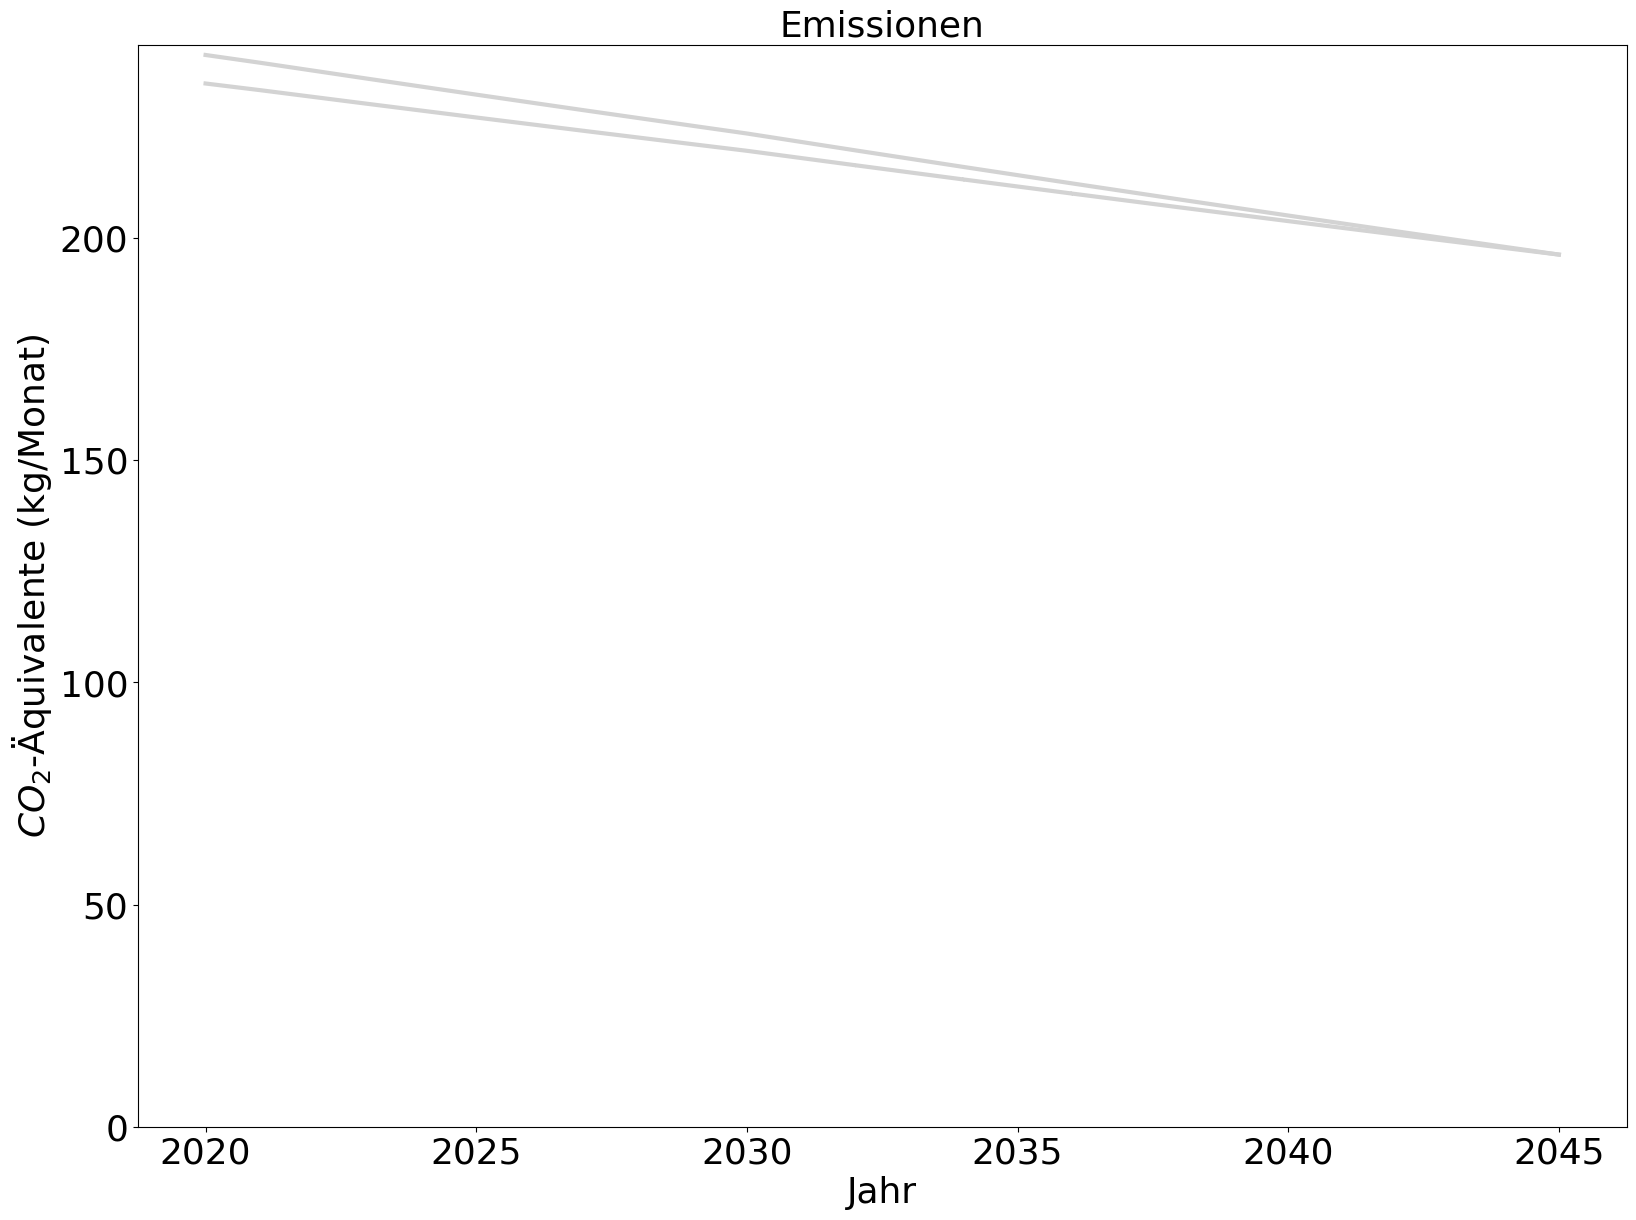

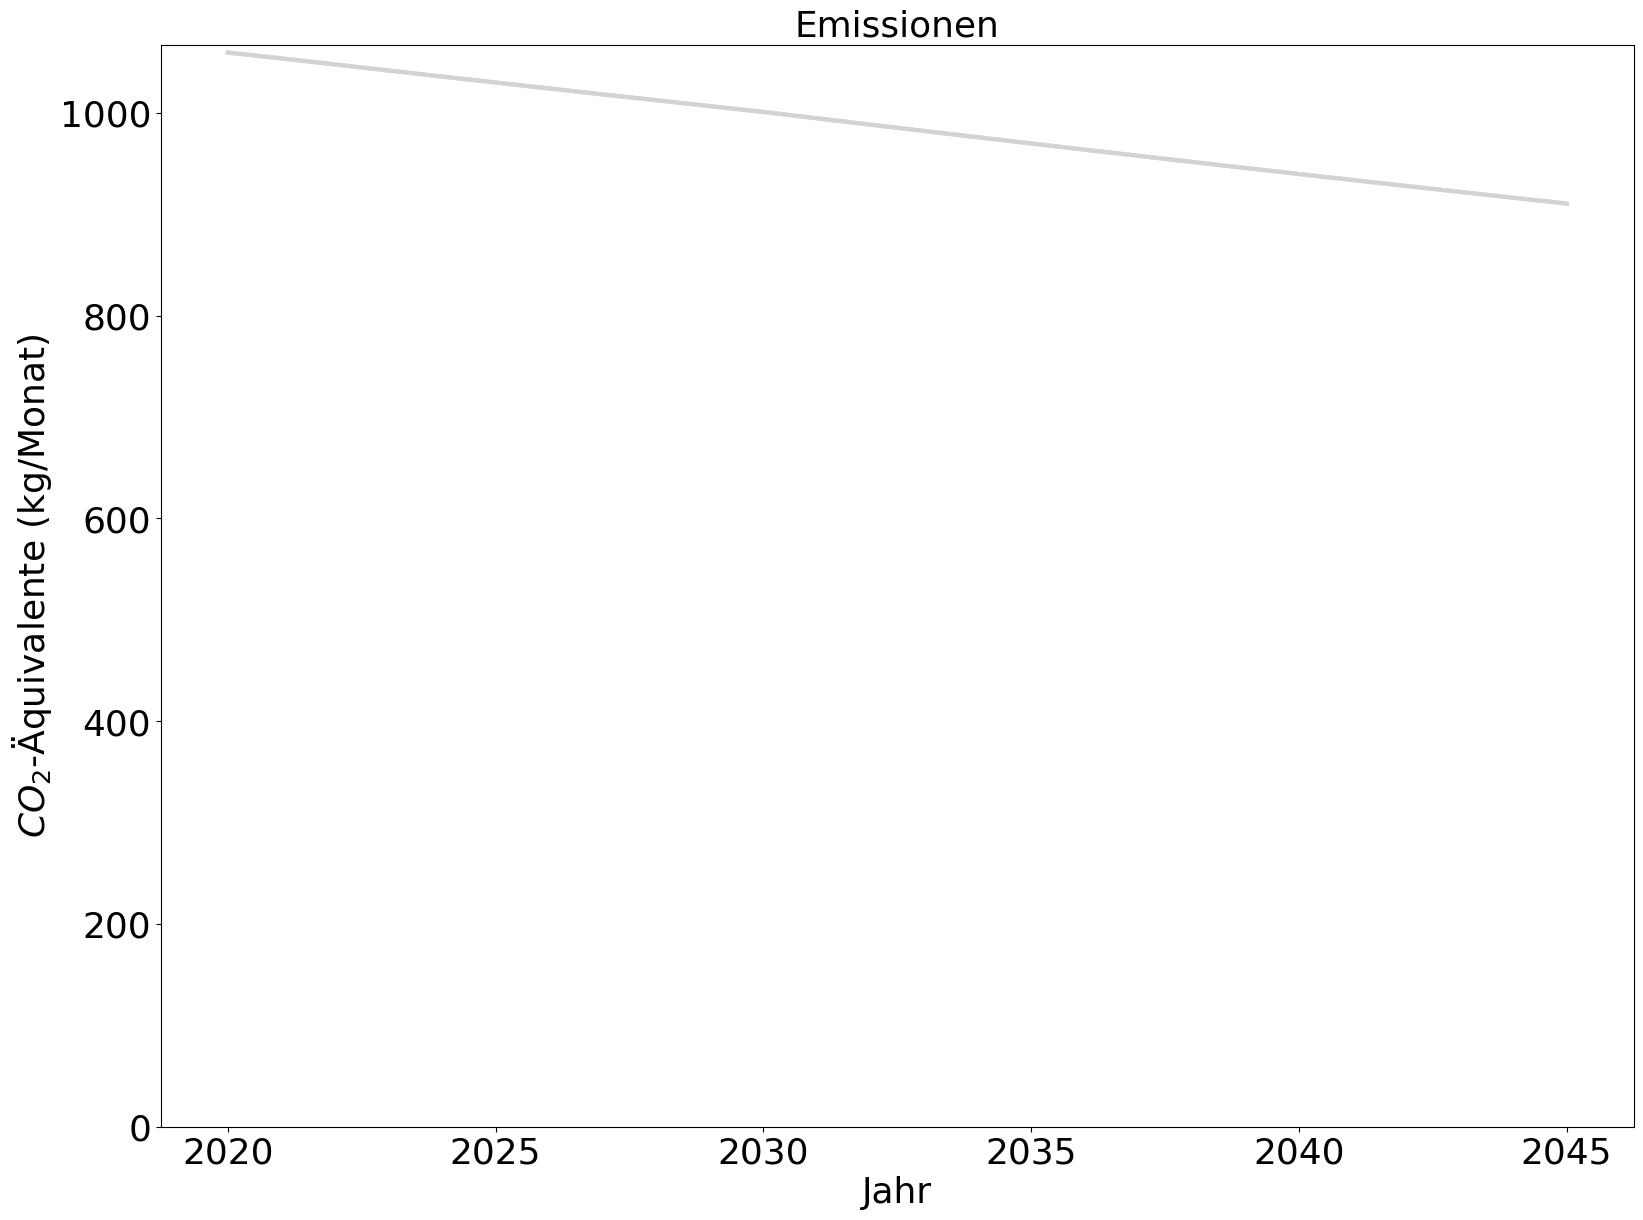

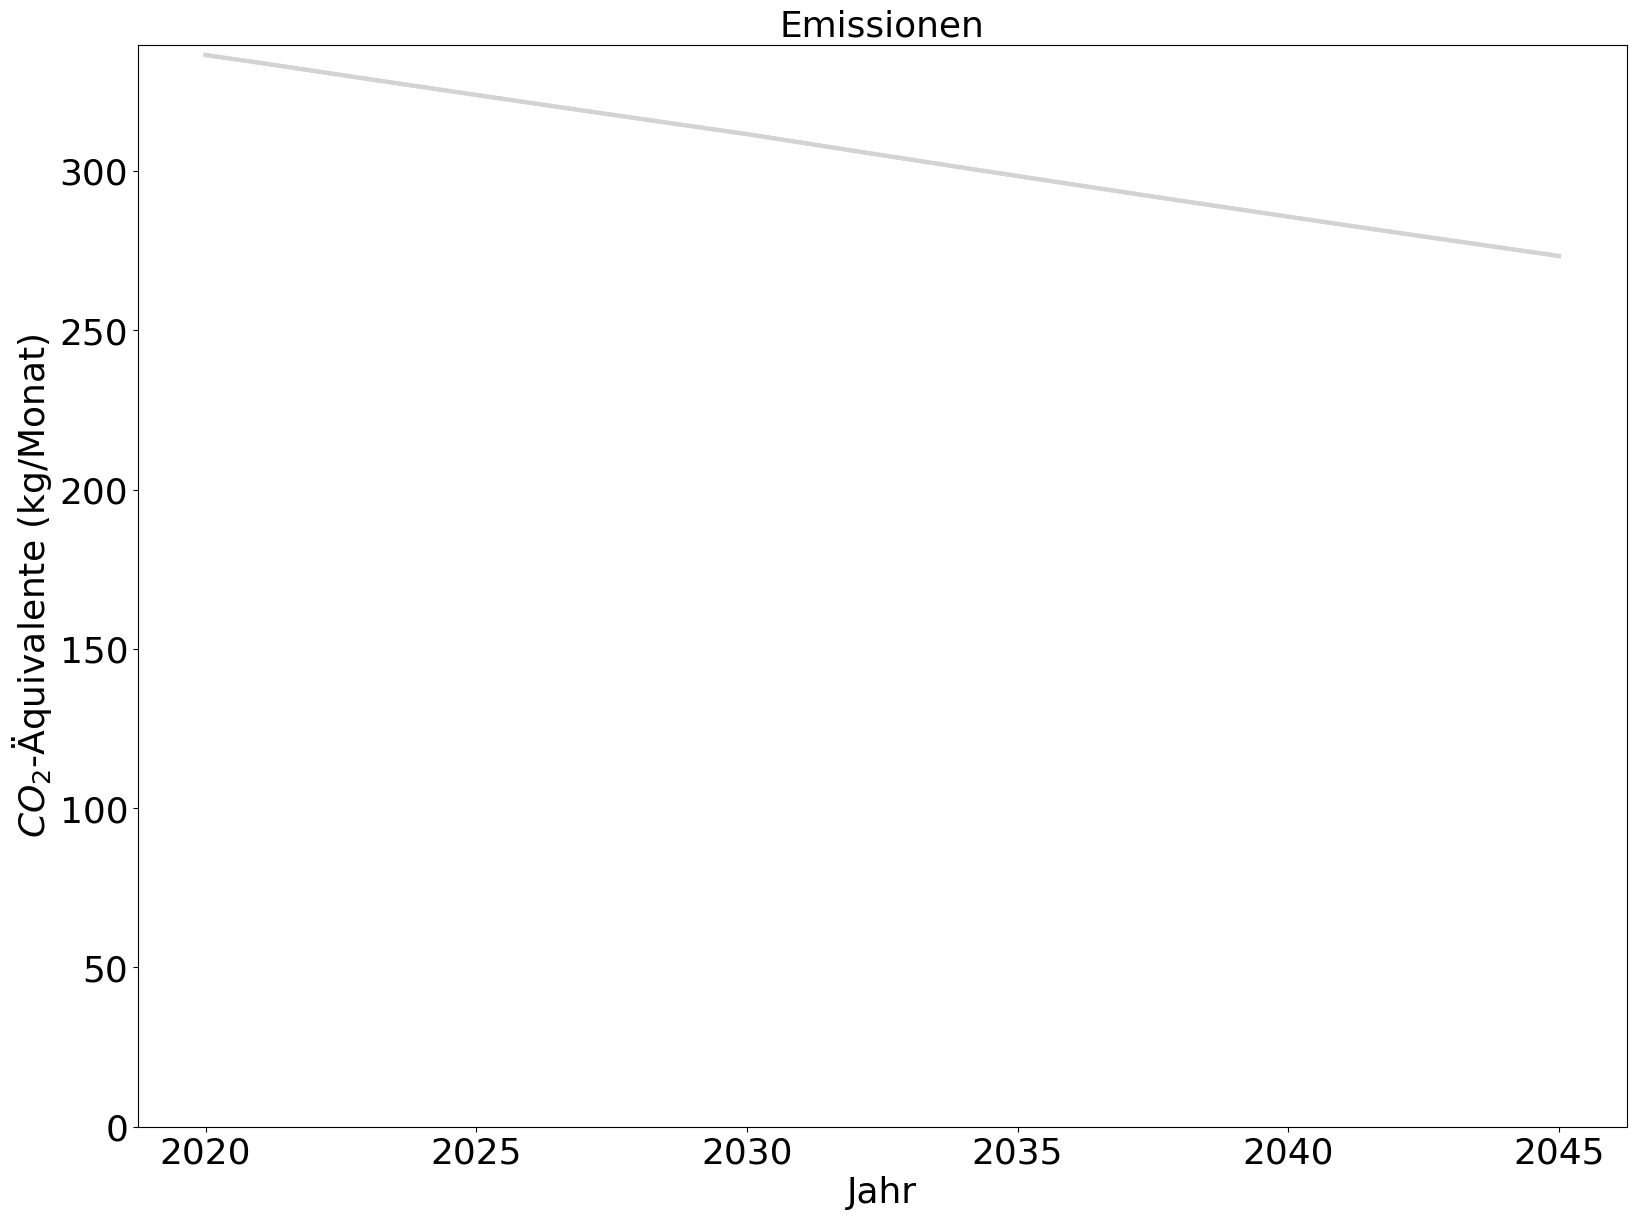

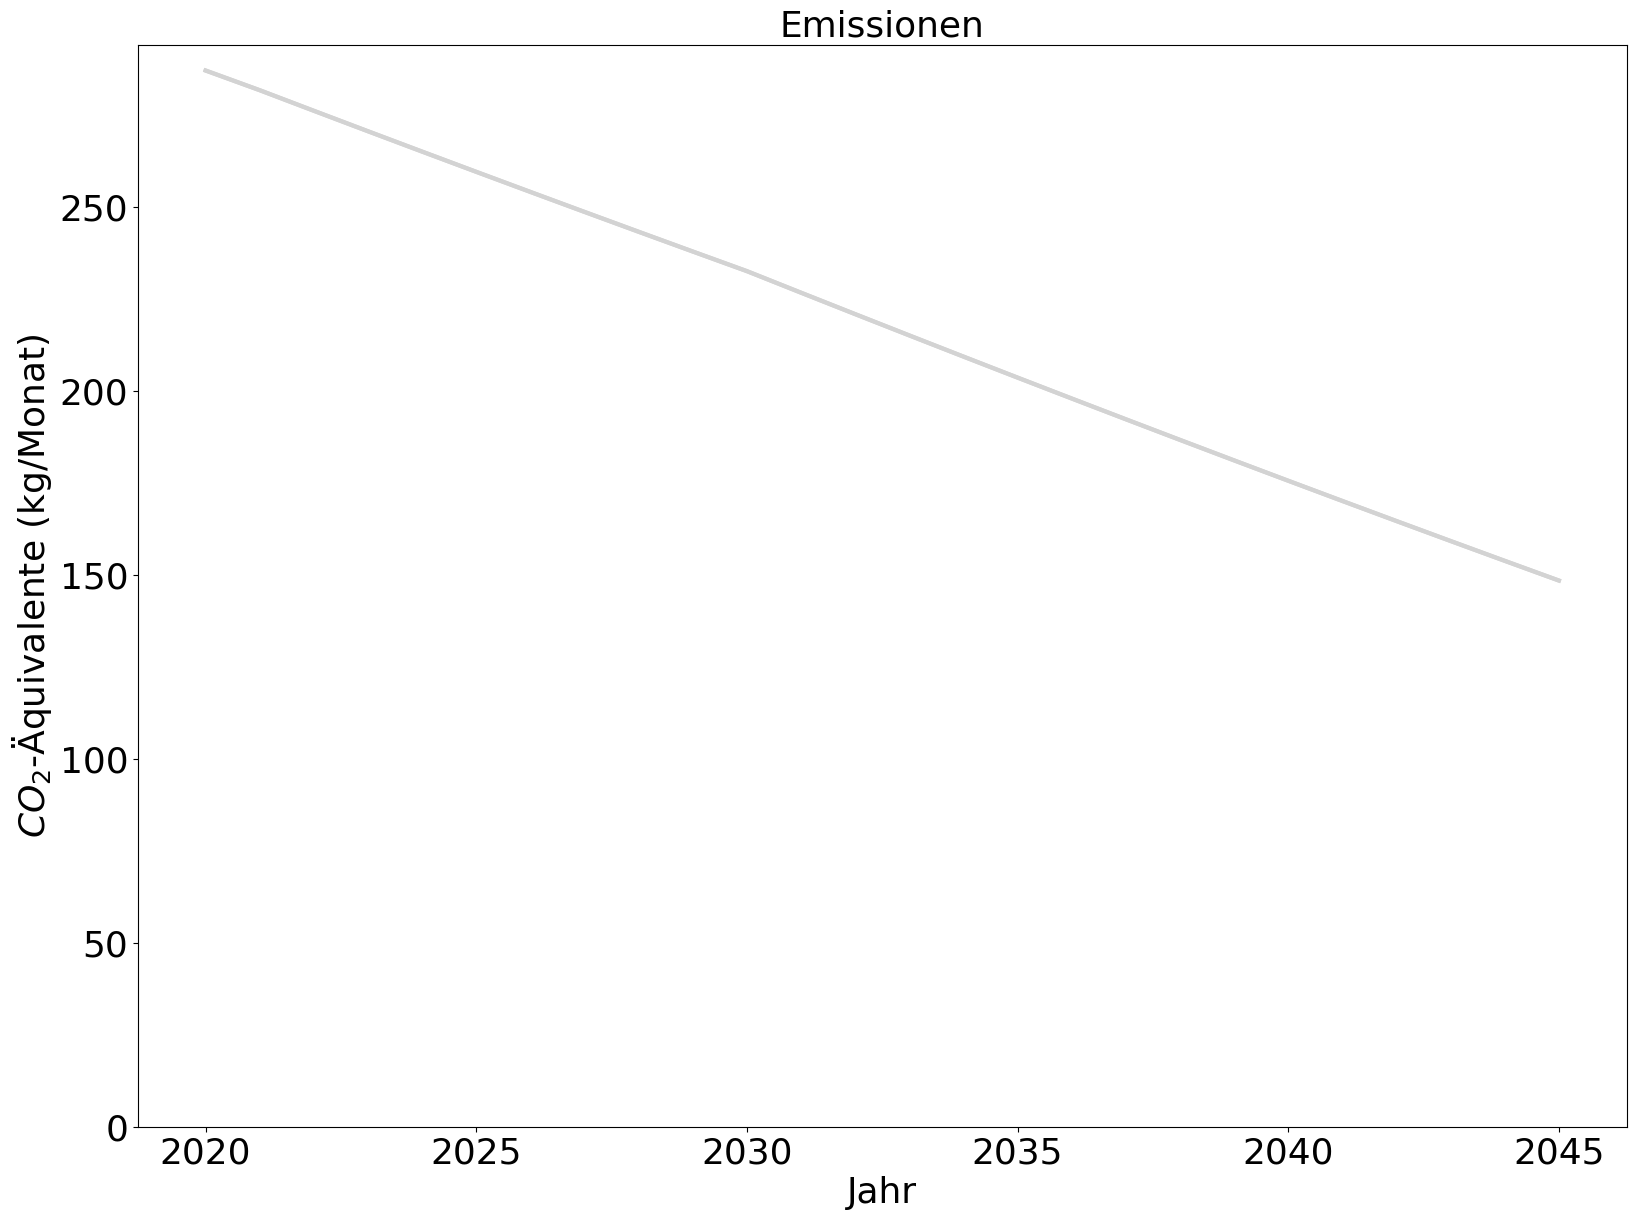

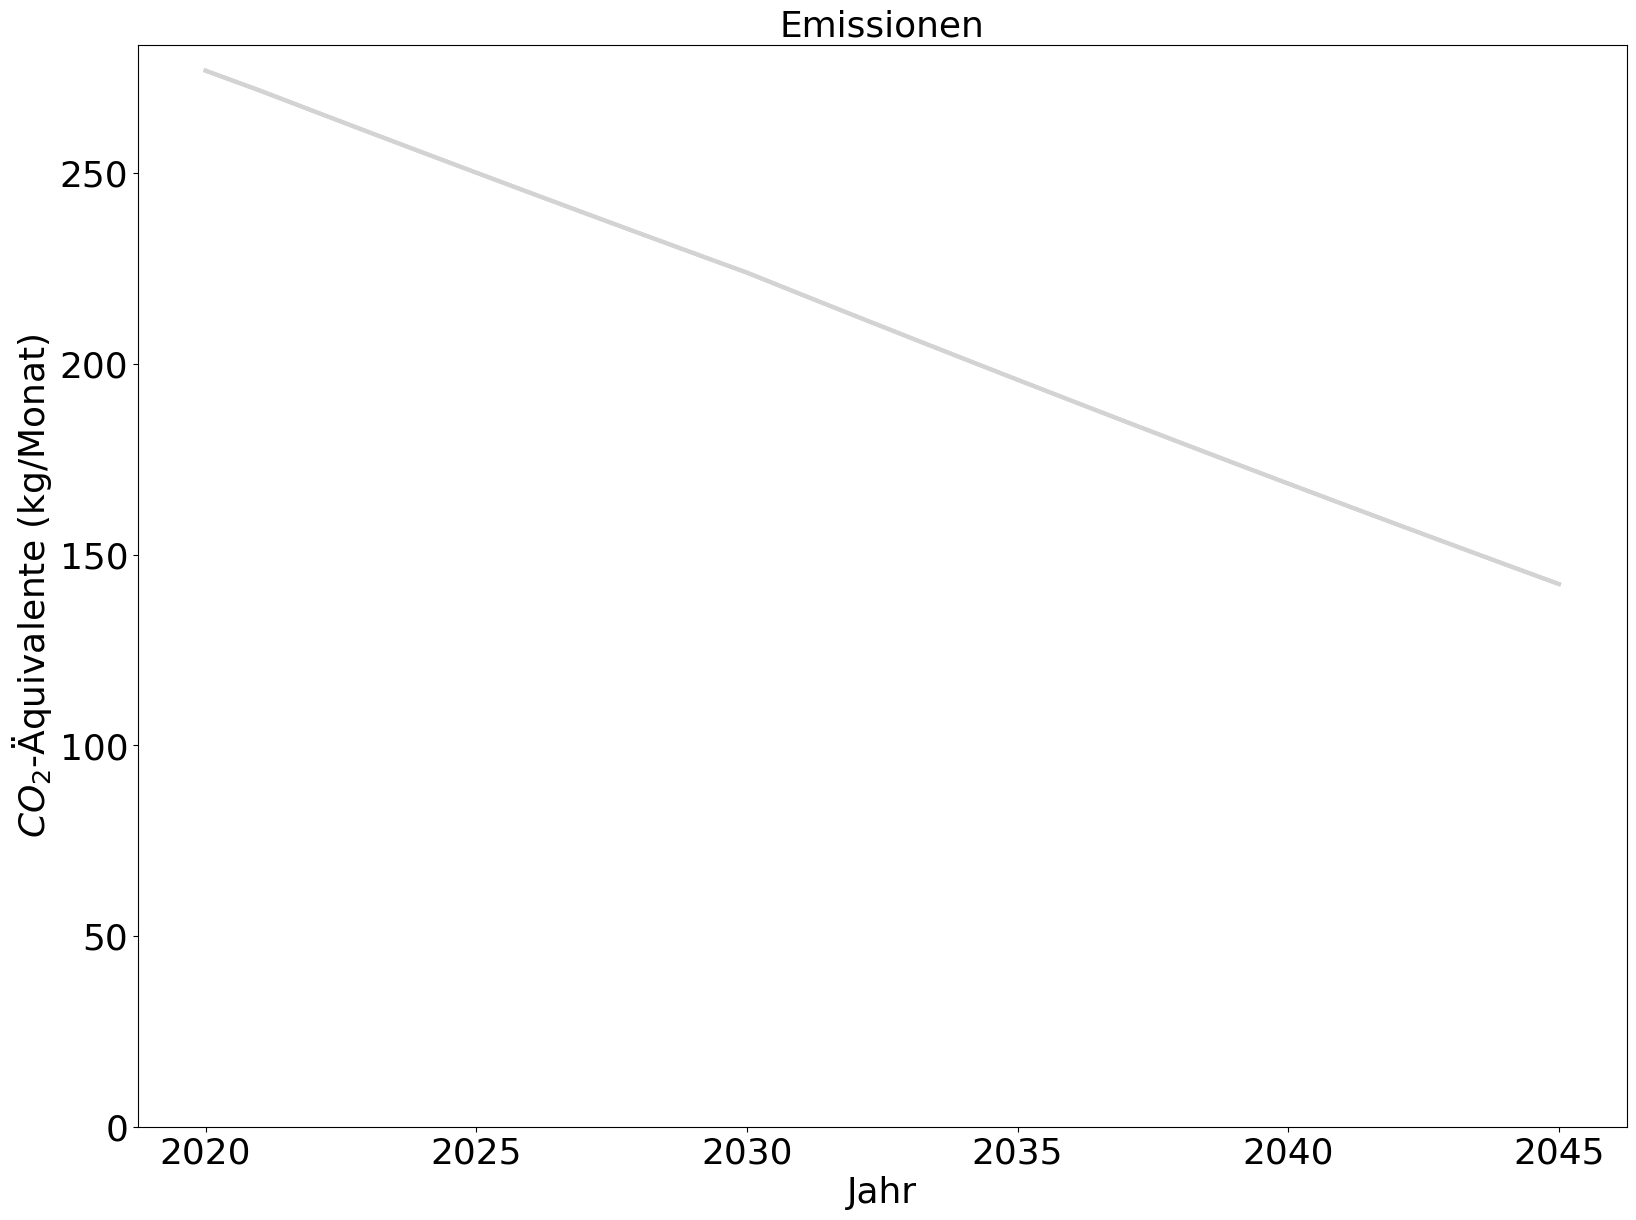

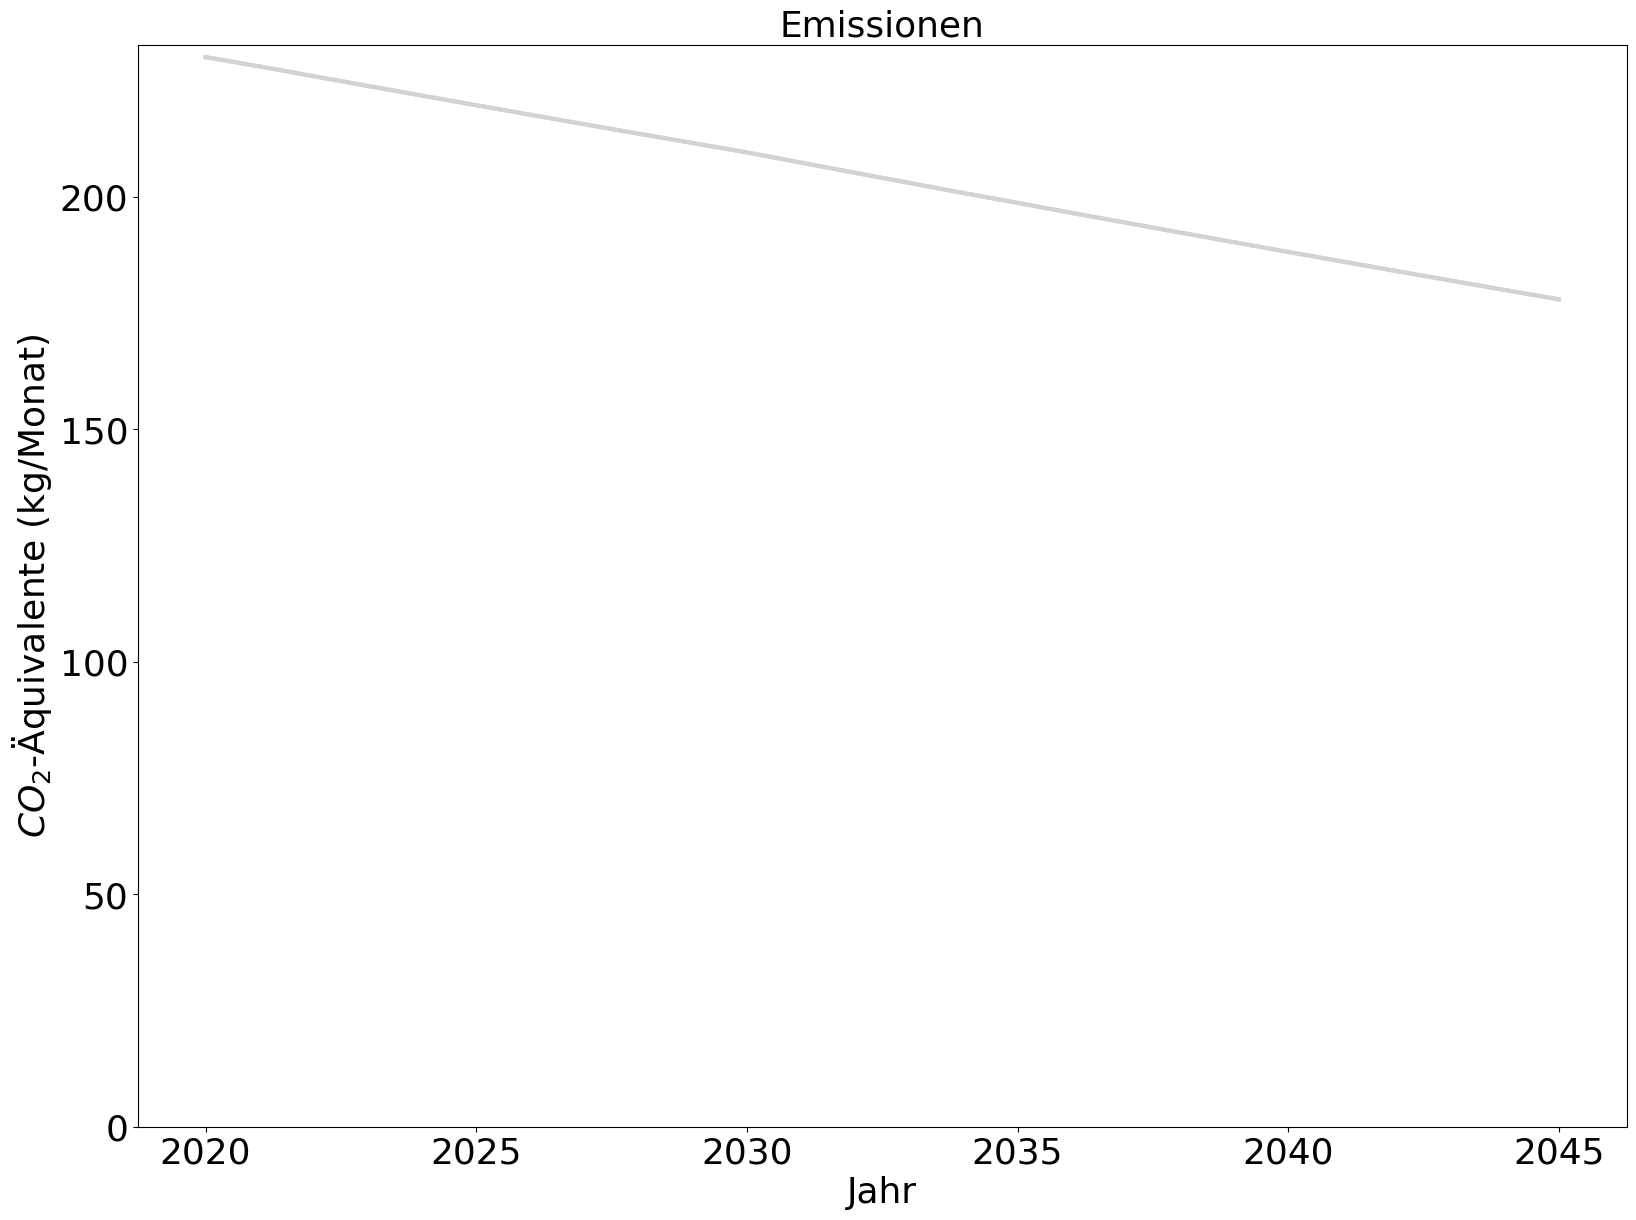

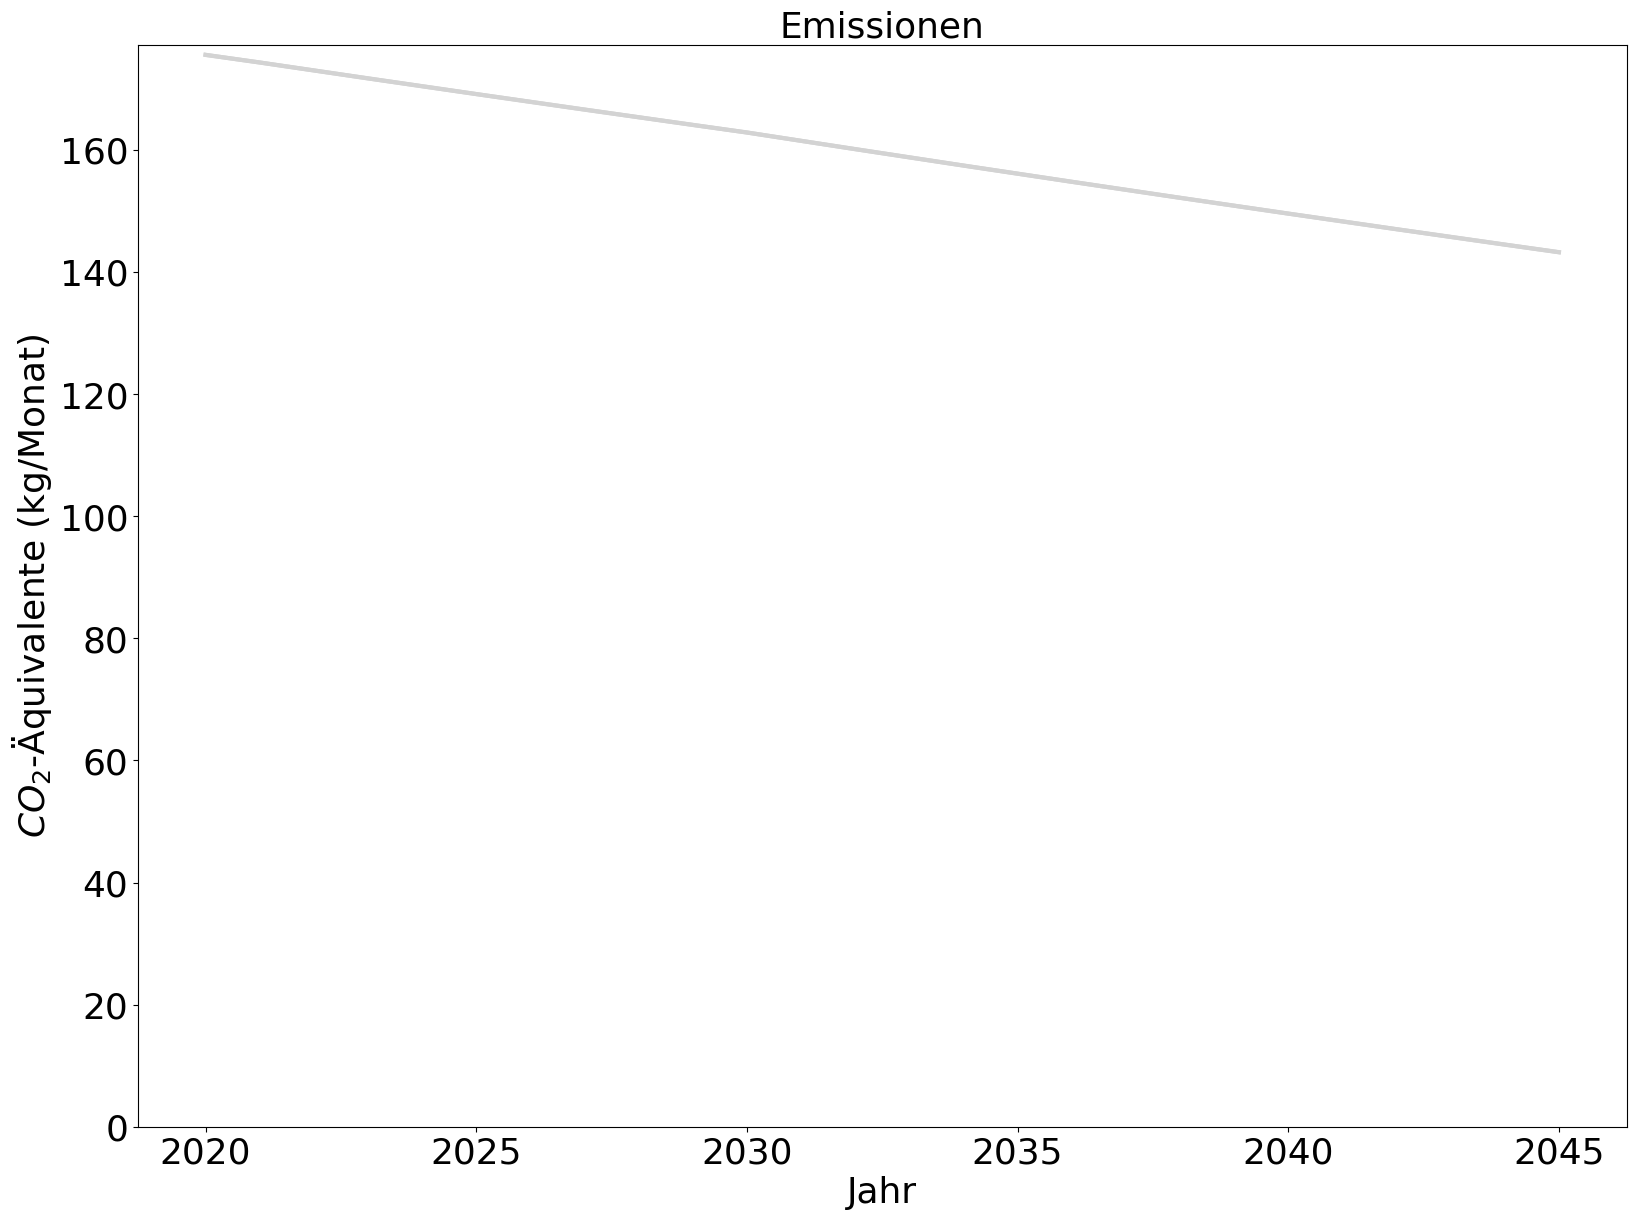

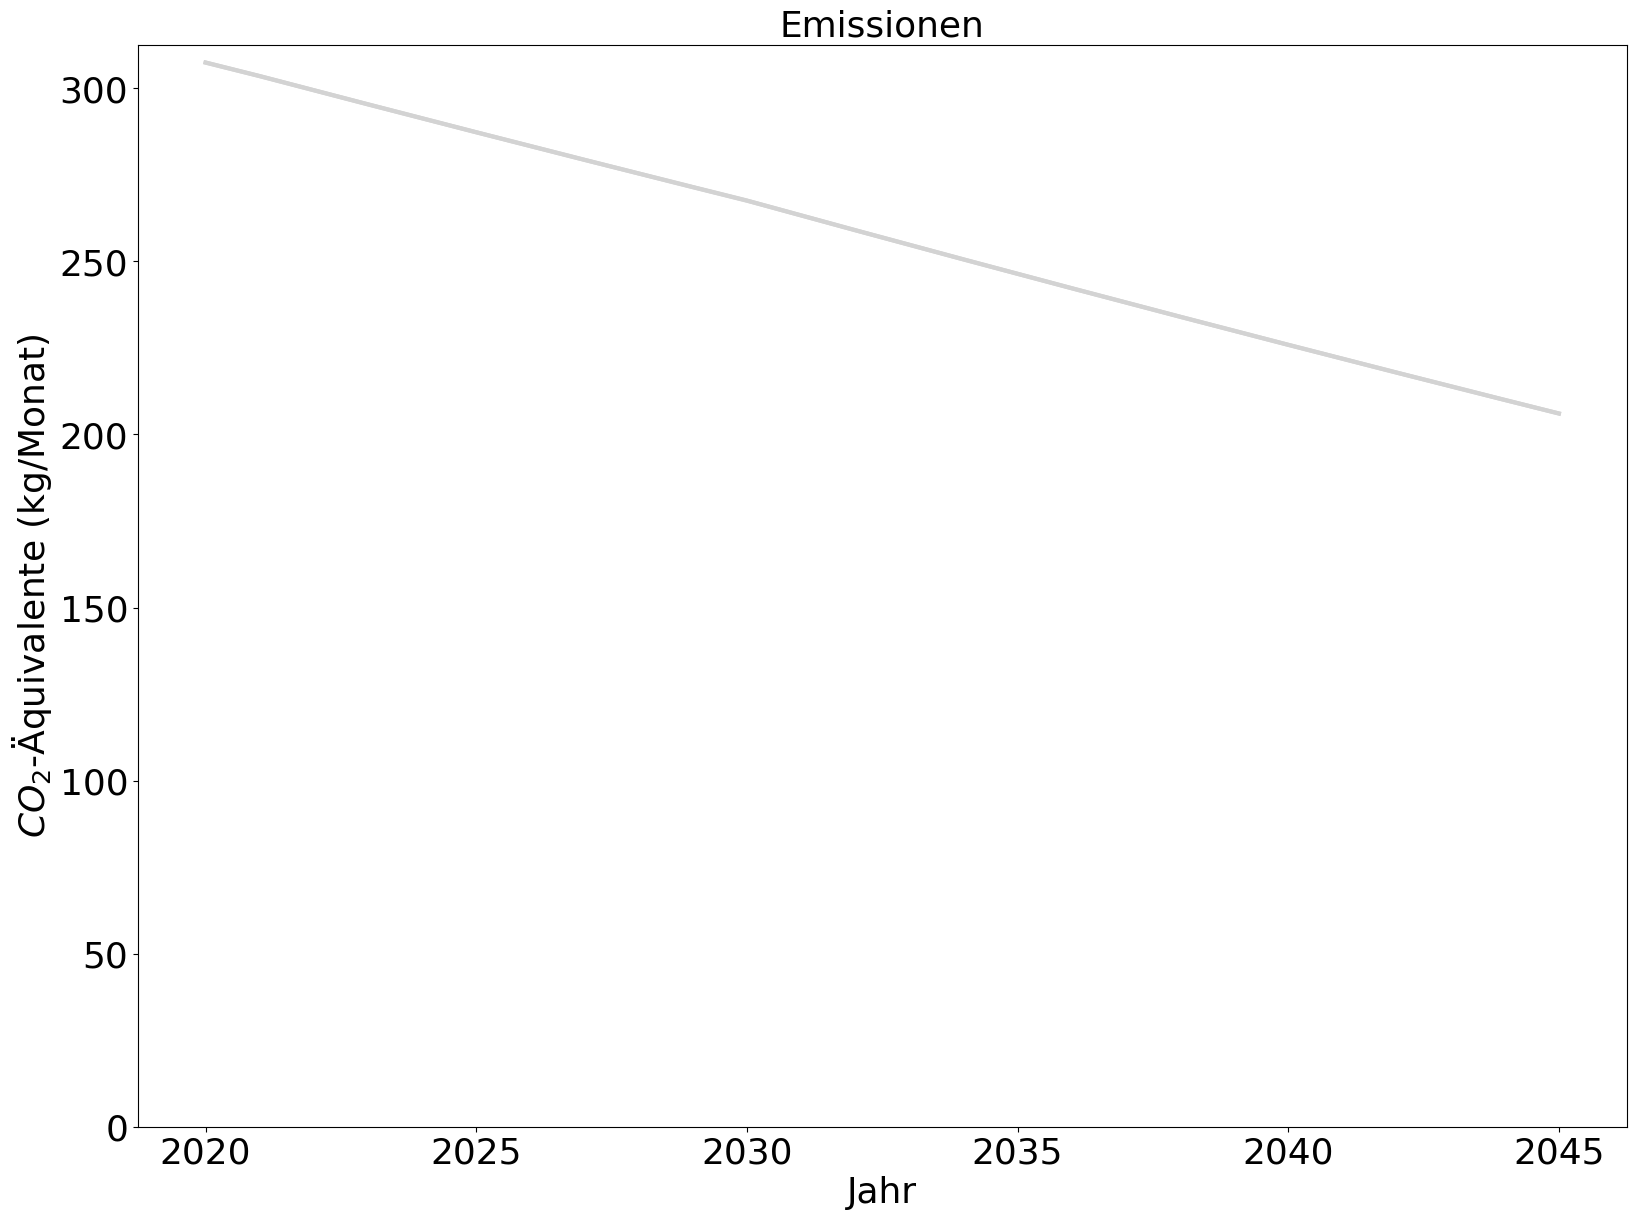

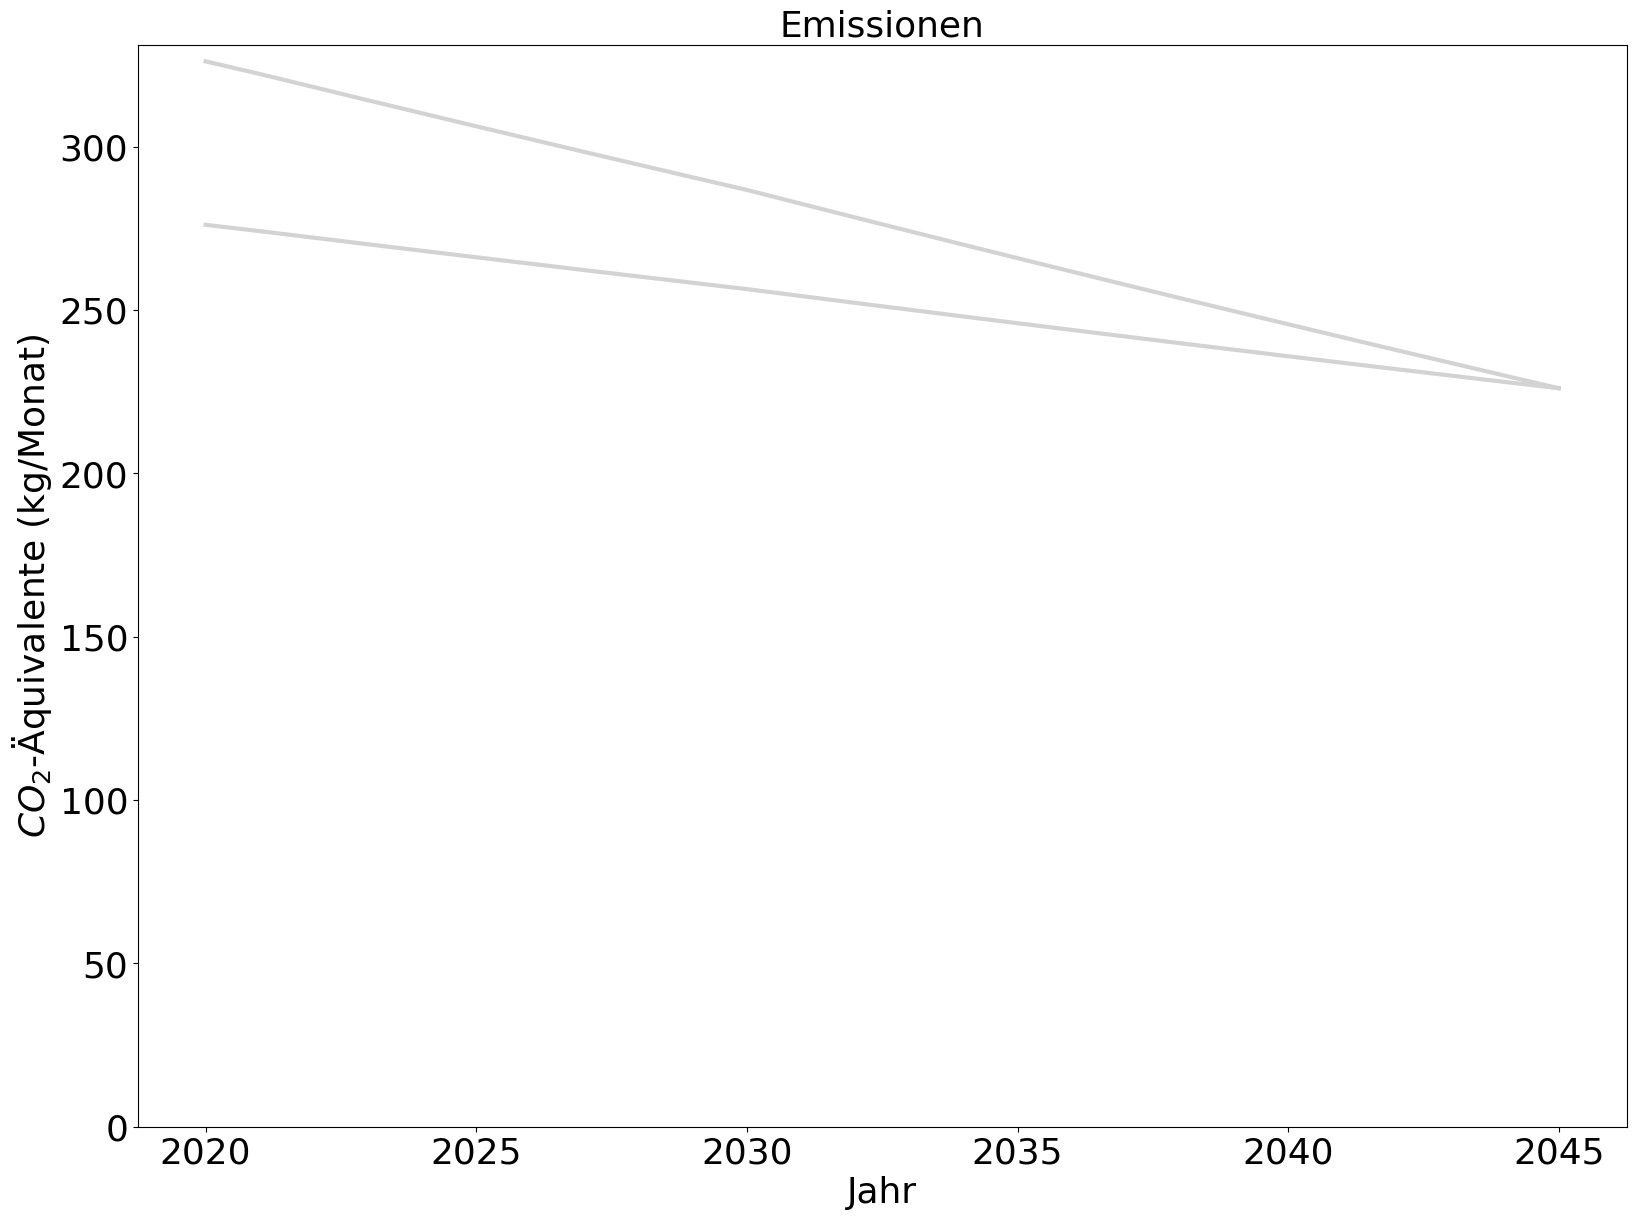

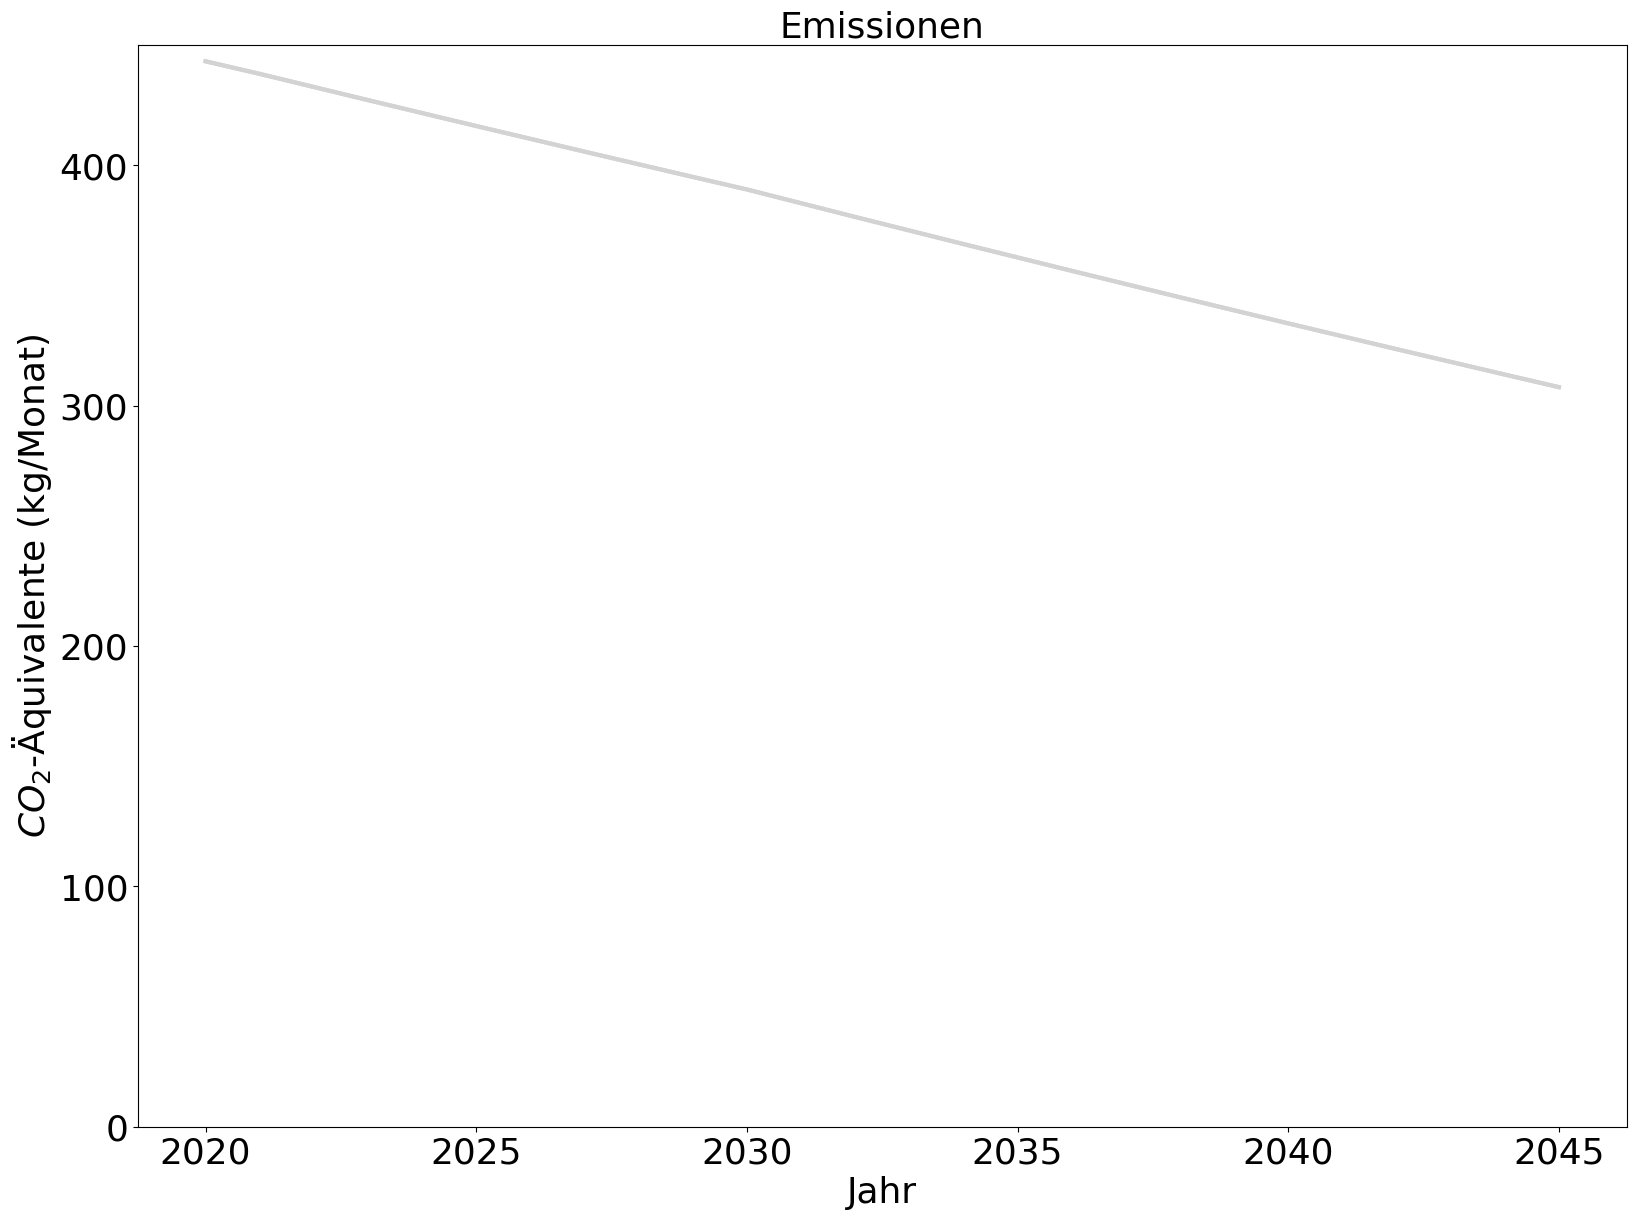

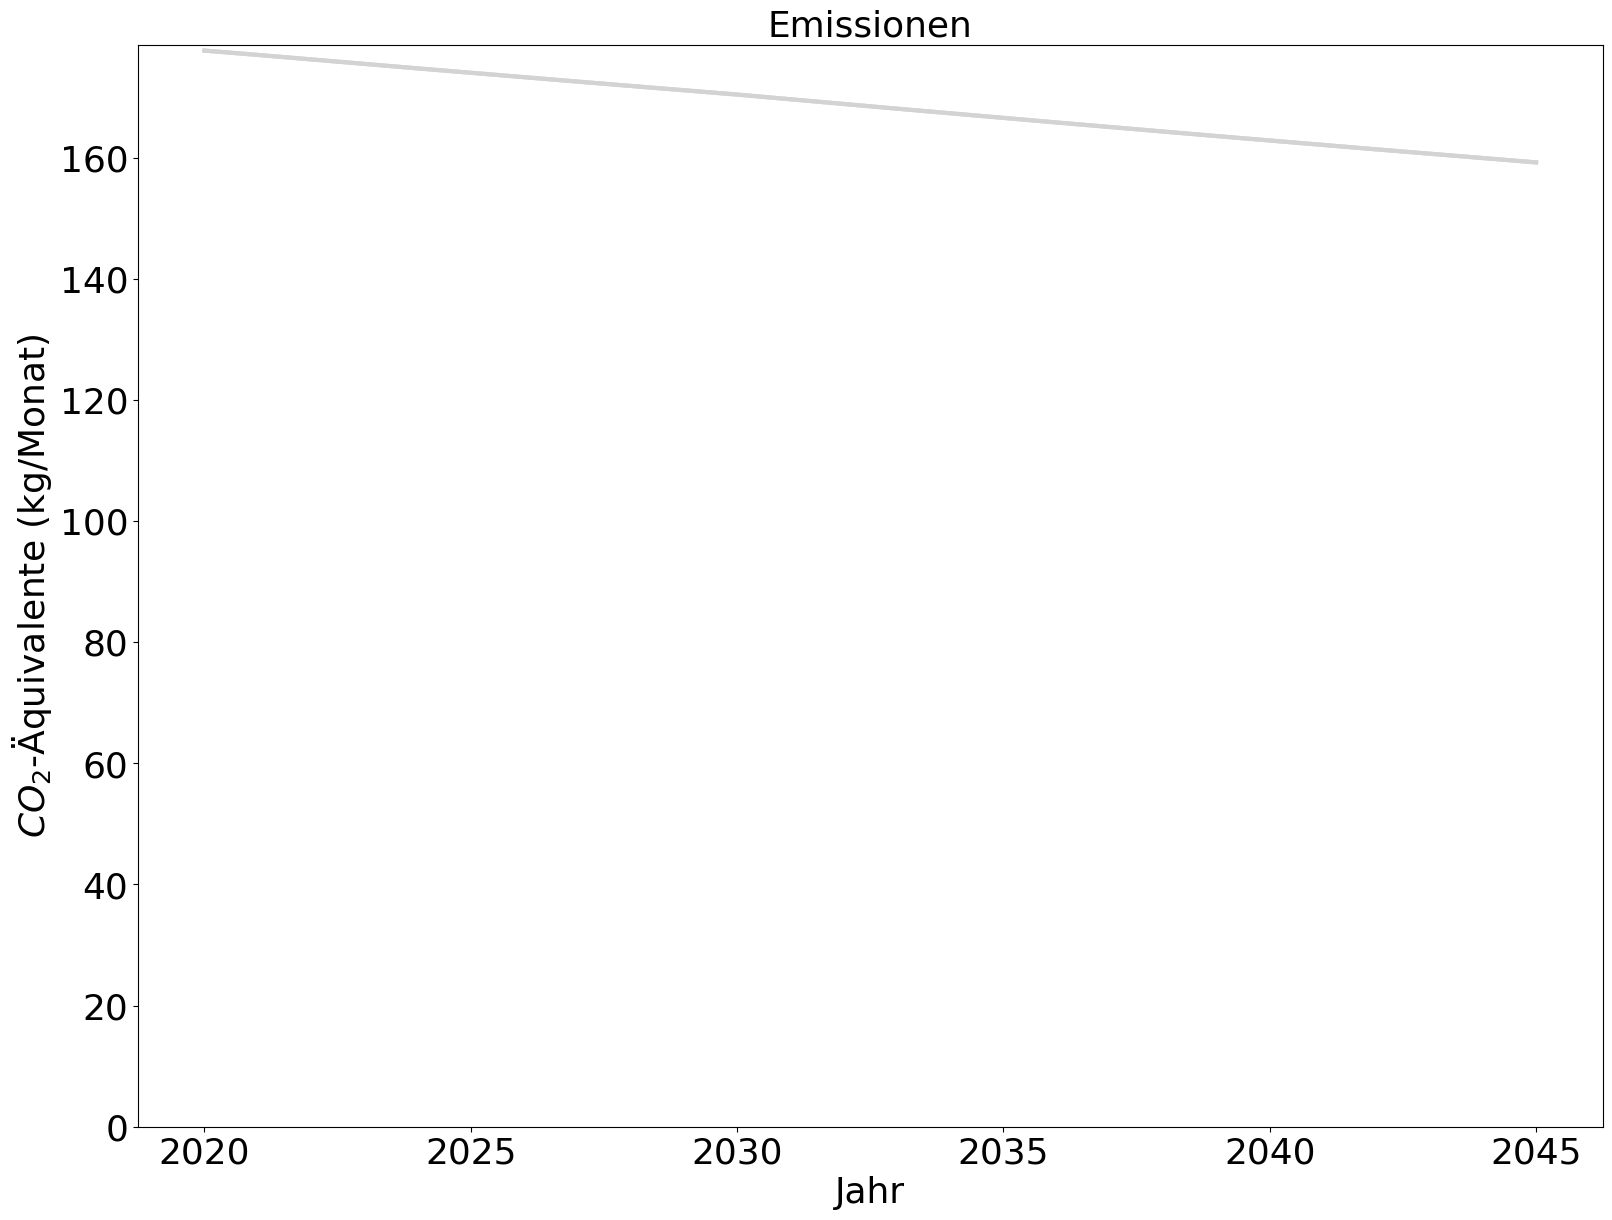

In [6]:
########## individual buildings data ########
for group_df in session.buildings.list_from_groups():
    if group_df is not None:
        for idx in group_df.index:

            # export emissions graph:
            graphs.export_individual_emissions(
                csv_name="/emissions/CO2_emissions_{0}.csv".format(
                    idx),
                data_folders=session.simulation.output_folders,
                columns=['building_household_emissions'],
                title_="Emissionen",
                outfile=session.simulation.current_output_folder +
                "/emissions/CO2_emissions_{0}.png".format(idx),
                xlabel_="Jahr",
                ylabel_="$CO_{2}$-Äquivalente (kg/Monat)",  # TODO: t/Jahr
                x_='current_date',
                convert_grams_to_kg=True,
                # compare_data_folder=session.simulation.current_output_folder + "/../../precomputed/simulation_defaults",
                figtext=
                    str(idx) + " "
                    + str(group_df.loc[idx, 'address']) + " "
                    + str(group_df.loc[idx, 'type'])
                    + "\nø-spez. Wärmeverbrauch: "
                    + str(group_df.loc[idx, 'avg_spec_heat_consumption'])
                    + ", ø-spez. Stromverbrauch: "
                    + str(group_df.loc[idx, 'avg_spec_heat_consumption'])
                    if session.VERBOSE_MODE else "",
                figsize=(16,12),  # inches
                overwrite_color='lightgray',
                show_legend=False
            )

In [ ]:
for group_df in session.buildings.list_from_groups():
    if group_df is not None:
        for idx in group_df.index:
            # export energy prices graph:
            graphs.export_individual_energy_expenses(
                csv_name="/energy_prices/energy_prices_{0}.csv".format(
                    idx),
                data_folders=session.simulation.output_folders,
                columns=['building_household_expenses_heat',
                        'building_household_expenses_power'],
                labels_=['Wärmekosten', 'Stromkosten'],
                outfile=session.simulation.current_output_folder +
                "/energy_prices/energy_prices_{0}.png".format(idx),
                title_="Energiekosten",
                xlabel_="Jahr",
                ylabel_="€/Monat",
                x_='current_date',
                figtext=
                    str(idx) + " "
                    + str(group_df.loc[idx, 'address']) + " "
                    + str(group_df.loc[idx, 'type'])
                    + "\nø-spez. Wärmeverbrauch: "
                    + str(group_df.loc[idx, 'avg_spec_heat_consumption'])
                    + ", ø-spez. Stromverbrauch: "
                    + str(group_df.loc[idx, 'avg_spec_heat_consumption'])
                    if session.VERBOSE_MODE else "",
                figsize=(16,12),  # inches
                overwrite_color='lightgray',
                label_show_iteration_round=False,
                prepend_historic_data=True
            )

## Copy data

after the simulation is done, copy the freshly created folder to `..data/precomputed/simulation_defaults`

In [5]:
import shutil

source = session.simulation.current_output_folder
destination = session.simulation.reference_data_folder + "_ylim0"

shutil.copytree(source, destination, dirs_exist_ok=True)

'/home/dunland/github/qScope/data/precomputed/simulation_defaults_ylim0'

---
## test stuff:

In [ ]:

# create individual emissions graphs from precomputed reference data:
for idx in session.buildings.df.index:
    graphs.export_default_graph(
        csv_name="/emissions/CO2_emissions_{0}.csv".format(
            idx),
        data_folders=[session.simulation.reference_data_folder],
        csv_columns=['building_household_emissions'],
        title_="CO2-Emissionen (monatlich berechnet)",
        outfile=session.simulation.reference_data_folder +
        "/emissions/CO2_emissions_{0}.png".format(idx),
        xlabel_="Jahr",
        ylabel_="ø-Emissionen [$kg_{CO2,eq}$]",
        x_='current_date',
        convert_grams_to_kg=True,
        # compare_data_folder=session.simulation.current_output_folder + "/../../precomputed/simulation_defaults",
        figsize=(16,12)  # inches
    )


In [ ]:
# example graph:
importlib.reload(graphs)
idx = "1.02"

# export emissions graph:
graphs.export_default_graph(
    csv_name="/emissions/CO2_emissions_{0}.csv".format(
        idx),
    data_folders=session.simulation.output_folders,
    csv_columns=['building_household_emissions'],
    title_="ø-CO2-Emissionen (monatlich berechnet)",
    # outfile=session.simulation.current_output_folder +
    # "/emissions/CO2_emissions_{0}.png".format(idx),
    xlabel_="Jahr",
    ylabel_="$CO_{2}$-Äquivalente (kg)",
    x_='current_date',
    convert_grams_to_kg=True,
    figsize=(16,12),  # inches
    show_legend=False
)

# export energy prices graph:
graphs.export_individual_graph(
    csv_name="/energy_prices/energy_prices_{0}.csv".format(
        idx),
    data_folders=session.simulation.output_folders,
    columns=['building_household_expenses_heat',
            'building_household_expenses_power'],
    labels_=['Wärmekosten', 'Stromkosten'],
    outfile=session.simulation.current_output_folder +
    "/energy_prices/energy_prices_{0}.png".format(idx),
    title_="Energiekosten",
    xlabel_="Jahr",
    ylabel_="€/Monat",
    x_='current_date',
    figtext=
        str(idx) + " "
        + str(group_df.loc[idx, 'address']) + " "
        + str(group_df.loc[idx, 'type'])
        + "\nø-spez. Wärmeverbrauch: "
        + str(group_df.loc[idx, 'avg_spec_heat_consumption'])
        + ", ø-spez. Stromverbrauch: "
        + str(group_df.loc[idx, 'avg_spec_heat_consumption'])
        if session.VERBOSE_MODE else "",
    figsize=(16,12),  # inches
    overwrite_color='lightgray',
    label_show_iteration_round=False
)
